# Projeto Final - Aprendizagem Automatica
## Tema Online Shoppers Intention
O conjunto de dados utilizado é chamado "Online Shoppers Purchasing Intention". Ele contém informações sobre visitas a um site de compras online e tem o objetivo de prever a intenção de compra dos visitantes.

### Feito por
David Cabrita XXX

Rendrick Carreira 201901365


# Descrição dos Dados

Administrative: (Inteiro) Número de páginas diferentes visitadas relacionadas com as questões administrativas do sítio Web.

Administrative_Duration: (Float) Duração total, em segundos, gasta pelo usuário em páginas relacionadas com as questões administrativas do sítio Web.

Informational: (Inteiro) Número de páginas diferentes visitadas relacionadas com informações sobre o sítio Web, produtos ou serviços.

Informational_Duration: (Float) Duração total, em segundos, gasta pelo usuário em páginas relacionadas com informações sobre o sítio Web, produtos ou serviços.

ProductRelated: (Inteiro) Número de páginas diferentes visitadas relacionadas com produtos do sítio Web.

ProductRelated_Duration: (Float) Duração total, em segundos, gasta pelo usuário em páginas relacionadas com produtos do sítio Web.

BounceRates: (Float) Taxa de rejeição, ou seja, a proporção de visitantes que saíram do sítio Web depois de visualizar uma única página.

ExitRates: (Float) Taxa de saída, ou seja, a proporção de visitantes que saíram do sítio Web após visualizar a página em questão.

PageValues: (Float) Valor médio das páginas visualizadas pelo usuário, calculado como a soma dos valores de transação dividida pelo número total de páginas visitadas.

SpecialDay: (Float) Proximidade do dia da visita a um evento especial (por exemplo, feriado), sendo 0 indicativo de um dia não especial e 1 indicativo de um dia especial.

Month: (Categórico) Mês da visita do usuário ao sítio Web, representado por abreviações em inglês (por exemplo, 'Jan' para janeiro, 'Feb' para fevereiro, etc.).

OperatingSystems: (Inteiro) Sistema operacional utilizado pelo usuário durante a visita ao sítio Web.

Browser: (Inteiro) Navegador utilizado pelo usuário durante a visita ao sítio Web.

Region: (Inteiro) Região geográfica do usuário.

TrafficType: (Inteiro) Tipo de tráfego que trouxe o usuário ao sítio Web.

VisitorType: (Categórico) Tipo de visitante do sítio Web, podendo ser "Returning Visitor" (Visitante que retorna), "New Visitor" (Novo Visitante) ou "Other" (Outro).

Weekend: (Booleano) Indica se a visita ocorreu em um fim de semana (TRUE) ou não (FALSE).

Revenue: (Booleano) Indica se o usuário gerou receita para o sítio Web (TRUE) ou não (FALSE).

# Limpeza de Dados e Análise Exploratória

In [1]:
#Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Definiçoes do dataframe 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# remover filtros de aviso
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carregamento de dados
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")

In [3]:
# Verificar se existem algum dado que falta
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


É possivel reparar que não falta dados em nenhuma coluna

In [4]:
# Mostrar o numero de amostras
num_amostras = df.shape[0]
print("Número de amostras:", num_amostras)

Número de amostras: 12330


In [5]:
# Este codigo vai mostrar o tipo de dados de cada coluna
print(df.dtypes)


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [6]:
#o resultado deste código será uma tabela que mostra a contagem de frequência de cada valor único em cada coluna
for coluna in df.columns:
    contagem_valores = df[coluna].value_counts()
    print(f"\nContagem de valores para a coluna '{coluna}':\n")
    print(contagem_valores)


Contagem de valores para a coluna 'Administrative':

Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: count, dtype: int64

Contagem de valores para a coluna 'Administrative_Duration':

Administrative_Duration
0.000000       5903
4.000000         56
5.000000         53
7.000000         45
11.000000        42
6.000000         41
14.000000        37
9.000000         35
15.000000        33
10.000000        32
13.000000        29
19.000000        29
12.000000        28
21.000000        28
3.000000         26
18.000000        26
20.000000        26
8.000000         26
17.000000        25
23.000000        24
37.000000        24
26.000000        20
33.000000        20
32.000000        19
16.000000        19
47.000000        19
3

Com base neste output é possivel reparar que certas colunas como:
* Administrative
* Administrative_Duration
* Informational
* Informational_Duration
* ProductRelated
* ProductRelated_Duration
* BounceRates
* ExitRates
Têm valores conitnuos, e com a normalização podemos colucar os valores num intervalo de 0 a 1 ou usar a padronização para ter média zero e desvio padrão um.
Por enquanto não vamos aplicar nenhuma delas para ver como o modelo vai correr

In [7]:
# Atribuição de variaveis para o grafico de dispersão
coluna_x = 'ProductRelated_Duration'
coluna_y = 'ExitRates'

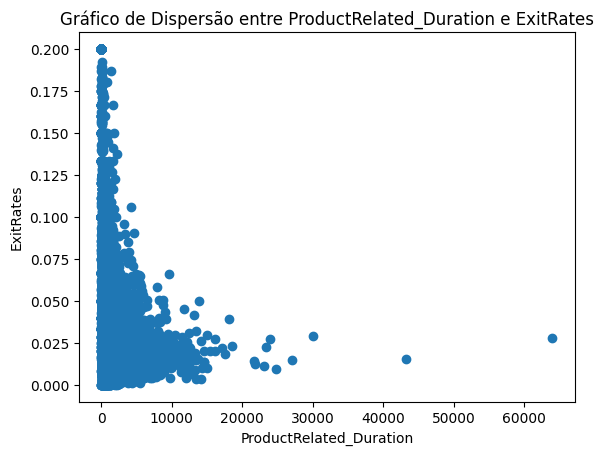

In [8]:
plt.scatter(df[coluna_x], df[coluna_y])
plt.xlabel(coluna_x)
plt.ylabel(coluna_y)
plt.title('Gráfico de Dispersão entre {} e {}'.format(coluna_x, coluna_y))
plt.show()

Após executar o código acima, você verá um gráfico de dispersão que representa a relação entre as colunas "ProductRelated_Duration" (Duração Relacionada a Produtos) e "ExitRates" (Taxa de Saída). Cada ponto no gráfico representa uma amostra do conjunto de dados, onde o valor de "ProductRelated_Duration" está no eixo x e o valor de "ExitRates" está no eixo y.

Ao analisar o gráfico, você pode observar se existe alguma tendência ou padrão entre a duração relacionada a produtos e as taxas de saída. Por exemplo, se os pontos estiverem concentrados em valores mais altos de "ProductRelated_Duration" e valores mais baixos de "ExitRates", isso pode sugerir que os usuários tendem a passar mais tempo em páginas relacionadas a produtos com uma menor taxa de saída.

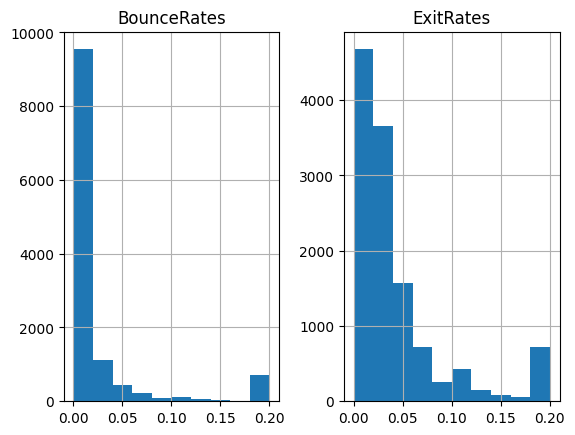

In [9]:
df[['BounceRates', 'ExitRates']].hist()
plt.show()

Nesse caso, o código irá gerar dois histogramas, um para a coluna "BounceRates" e outro para a coluna "ExitRates". Os histogramas mostrarão a contagem de frequência dos valores em cada coluna e a quantidade de amostras em diferentes intervalos de valores.

In [10]:
# Remoçao de dados em falta
df.dropna(inplace=True)

In [11]:
df_new=df.copy(deep=True)

A estrategia usada para "preencher os dados" em falta foi a remoçao das mesmas, porque se a quantidade de amostras com dados ausentes for relativamente pequena em comparação com o tamanho do conjunto de dados (que é neste caso) e não houver um padrão sistemático na ausência desses dados, é possível remover as amostras que contêm valores em falta.

In [12]:
#Transformar os dados em categorias para ser mais facil de manusear os dados
df1=pd.get_dummies(data=df_new,columns=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue'],drop_first=True)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [13]:
df1.rename(columns={'Revenue_True':'Revenue'},inplace=True)
df1.shape

(12330, 69)

In [14]:
df_p=df1.copy(deep=True)

# Método de Machine Learning Aplicado - Modelação
Para a criação do modelo vamos usar os dados de Revenue

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [16]:
X=df_p.drop('Revenue',axis=1)
y=df_p['Revenue']

# Divisão dos dados para treino and teste

In [17]:
# Neste caso vamos usar 20% de dados de teste
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [18]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9864, 68) (2466, 68) (9864,) (2466,)


# logistic regression

Utilizamos este modelo, porque é um modelo estatístico amplamente utilizado para problemas de classificação binária (Adicionar mais XXX)

In [19]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

# Matrix de confusão

<Axes: >

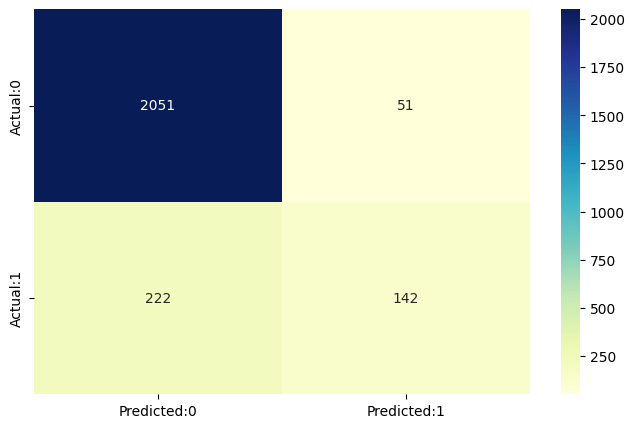

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [21]:
cm_reference = pd.DataFrame(np.array(["TP","FP","FN","TN"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

         Predicted:0 Predicted:1
Actual:0          TP          FP
Actual:1          FN          TN


In [22]:
TP=cm[0,0]
TN=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [23]:
print("True Negatives :",TN)
print("True Positives :",TP)
print("False Negative :",FN," (Type II error)")
print("False Positives :",FP," (Type I error)")
print("correctly predicted :",TP+TN)
print("miss-classified :",FN+FP)

True Negatives : 142
True Positives : 2051
False Negative : 222  (Type II error)
False Positives : 51  (Type I error)
correctly predicted : 2193
miss-classified : 273


## Resultados

Com base na matrix de confusão, e do texto é possivel vericar que:

* True Negatives (Verdadeiros Negativos): Existem 142 casos em que o modelo previu corretamente a classe negativa (não geração de receita) e a verdadeira classe também era negativa.

* True Positives (Verdadeiros Positivos): Existem 2051 casos em que o modelo previu corretamente a classe positiva (geração de receita) e a verdadeira classe também era positiva.

* False Negatives (Falsos Negativos): Existem 222 casos em que o modelo previu incorretamente a classe negativa (não geração de receita), mas a verdadeira classe era positiva. Isso representa um erro do Tipo II, indicando que o modelo não conseguiu identificar corretamente os casos em que a geração de receita ocorreu.

* False Positives (Falsos Positivos): Existem 51 casos em que o modelo previu incorretamente a classe positiva (geração de receita), mas a verdadeira classe era negativa. Isso representa um erro do Tipo I, indicando que o modelo identificou erroneamente a geração de receita em casos em que ela não ocorreu.

* Corretamente Previstos: Existem 2193 casos em que o modelo previu corretamente a classe, independentemente de ser positiva ou negativa.

* Classificados Incorretamente: Existem 273 casos em que o modelo fez uma previsão incorreta, considerando tanto os falsos positivos quanto os falsos negativos.

# evaluation metrics

In [24]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.889294403892944 

 The Miss-classification = 1-Accuracy =  0.11070559610705599 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9023317201935768 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.7357512953367875 

 Positive Predictive value = TP / (TP+FP) =  0.9757373929590866 

 Negative predictive Value = TN / (TN+FN) =  0.3901098901098901 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  3.4147063136737312 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.1327463239622513


In [25]:
# Criação duma tabela dos resultados da matrix
df_results = pd.DataFrame(columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])

In [26]:
# Resultados da logistic Model
description = "Logistic Model"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Base logit model,273,51,222,0.74,0.39,0.89,0.51,0.68


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2102
        True       0.74      0.39      0.51       364

    accuracy                           0.89      2466
   macro avg       0.82      0.68      0.72      2466
weighted avg       0.88      0.89      0.87      2466



## Verificação de outros modelos
Nesta etapa vamos usar outros modelos como model tree e o KNN para verificar qual o melho modelo a ser usado

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [29]:
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')

In [30]:
models = [] 
models.append(('DT',DT))
models.append(('KNN',KNN))

In [31]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring='f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))


DT: 0.136451 (0.003281)
KNN: 0.160716 (0.013216)


Os modelos têm valores valores relativamente baixos, mas o KNN tem um valor melhor. Contudo vamos construir ambos os modelos e compara-los


In [32]:
rf=KNeighborsClassifier().fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       False       0.89      0.96      0.92      2102
        True       0.55      0.28      0.37       364

    accuracy                           0.86      2466
   macro avg       0.72      0.62      0.65      2466
weighted avg       0.84      0.86      0.84      2466



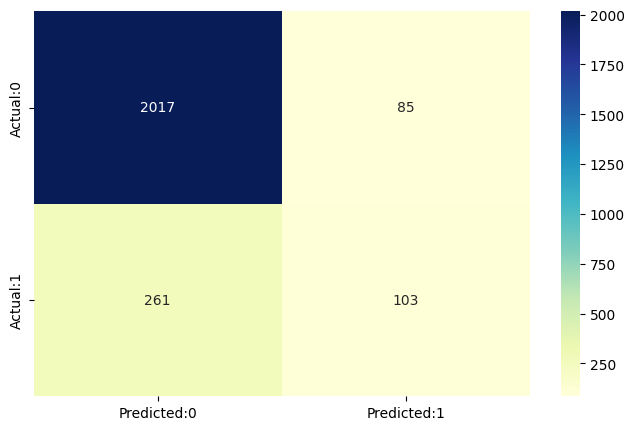

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rf)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TP=cm[0,0]
TN=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [34]:
description = "KNeighbors Classifier"  
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred_rf),2)
recall = round(recall_score(y_test,y_pred_rf),2)
accuracy = round(accuracy_score(y_test,y_pred_rf),2)
f1 = round(f1_score(y_test,y_pred_rf),2)
auc = round(roc_auc_score(y_test,y_pred_rf),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Base logit model,273,51,222,0.74,0.39,0.89,0.51,0.68
0,KNeighbors Classifier,346,85,261,0.55,0.28,0.86,0.37,0.62


In [35]:
ada=DecisionTreeClassifier().fit(x_train,y_train)
y_pred_ada=ada.predict(x_test)
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

       False       0.92      0.91      0.92      2102
        True       0.53      0.55      0.54       364

    accuracy                           0.86      2466
   macro avg       0.72      0.73      0.73      2466
weighted avg       0.86      0.86      0.86      2466



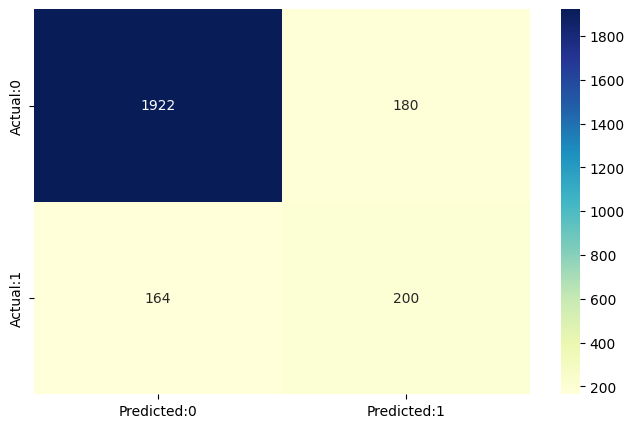

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_ada)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TP=cm[0,0]
TN=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [37]:
description = "Decision Tree Classifier" 
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred_ada),2)
recall = round(recall_score(y_test,y_pred_ada),2)
accuracy = round(accuracy_score(y_test,y_pred_ada),2)
f1 = round(f1_score(y_test,y_pred_ada),2)
auc = round(roc_auc_score(y_test,y_pred_ada),2)

df_results = pd.concat([df_results,
pd.DataFrame(np.array([description,
   misclassifications,
   type1,
   type2,
   precision,
   recall,
   accuracy,
   f1,
   auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Base logit model,273,51,222,0.74,0.39,0.89,0.51,0.68
0,KNeighbors Classifier,346,85,261,0.55,0.28,0.86,0.37,0.62
0,Decision Tree Classifier,344,180,164,0.53,0.55,0.86,0.54,0.73


# Resultados

é possivel reparar que apesar do logistic model ser o que possui um valor mais alto apresenta uma precisão de 0.73 que é um valor "OK", mas podemos aumentar esse valor se padronizarmos os dados

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix

# Carregar o arquivo CSV em um DataFrame
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')

# Separar as features (X) e o target (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Engenharia de recursos: Criar variáveis indicadoras para recursos categóricos
X = pd.get_dummies(X)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Seleção de características usando regressão logística L1
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
feature_selector = SelectFromModel(logreg)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Treinar o modelo de regressão logística com as características selecionadas
model = LogisticRegression(random_state=42)
model.fit(X_train_selected, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_selected)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisão do modelo: {:.2f}%'.format(accuracy * 100))

# Exibir a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(confusion)

# Calcular métricas adicionais
TN = confusion[0, 0]
TP = confusion[1, 1]
FN = confusion[1, 0]
FP = confusion[0, 1]
correctly_predicted = TN + TP
miss_classified = FN + FP

print('Verdadeiros Negativos (TN):', TN)
print('Verdadeiros Positivos (TP):', TP)
print('Falsos Negativos (FN):', FN)
print('Falsos Positivos (FP):', FP)
print('Previsões Corretas:', correctly_predicted)
print('Classificações Incorretas:', miss_classified)


Precisão do modelo: 87.31%
Matriz de Confusão:
[[2008   47]
 [ 266  145]]
Verdadeiros Negativos (TN): 2008
Verdadeiros Positivos (TP): 145
Falsos Negativos (FN): 266
Falsos Positivos (FP): 47
Previsões Corretas: 2153
Classificações Incorretas: 313


Agora com os dados padronizados é possivel ver que a precisão do modelo aumentou